# The Dance of Venus
In this we are going see how to determine a perfect timing for a greate Venus and Moon photo.

## Introduction
Right after sunset, we may have seen a bright star in the sky that is visible for a few hours before it vanishes below the horizon. In a few days, it will be gone and reappear in the morning hours right before sunrise. The evening star becomes the morning star.

This is not a star but the planet Venus. 
When are the Moon and Venus this close constellation? In the last couple weeks Venus was clearrly visible so how many opportunities did we have to see this constallation?

We will reduce the underlying complexity of this problem to a few simple computations that will give us an easy answer to our question.

## Let's Start
What do we need to determine the points of time where Venus and Moon are close to each other?

Well, we needd to compute the <b>phase angle</b> between the Moon and Venus as seen from our home planet Earth. The phase angle is the <b>angle that is enclosed be the two Earth -centric directional vectors that point to the Moon and to the Venus</b>.

We will compute the <b>angular distance</b> between both the objects for a certain time period. During the time period, both objects move along the Sky with changing angular distances to the Sun. We also need to compute a minimum distance between <b>Sun - Venus</b> and <b>Sun - Moon</b>. Otherwise we might compute constellations wherer all 3 objects are too close.

We will use only 2 kernel paths. de432s.bsp is required for the position computation of the celestial bodies and naif0012.tls is the kernel that contains temporal information like leap-seconds.

In [1]:
import datetime as dt
import spiceypy as sp
import numpy as np
import pandas as pd

sp.furnsh('_kernels/lsk/naif0012.tls')
sp.furnsh('_kernels/spk/de432s.bsp')

After loading the meta file with <i><b>furnsh</b></i>, we can define a time interval for our computations: the initial time is se to thte beginning of the year 2020 and the end date is 1st June 2020. The created date-time strings are converted to Ephermeris time (ET) using the SPICE function <i><b><u>utc2et</u></b></i>. The array <i>TIME_INTERVAL</i> contains all the ETs form the initial time to the end time in 3600 seconds (1 hour) steps.

In [2]:
# import the modules
# Create an initial and ending time object that is converted to a string
INIT_TIME_UTC_STR = dt.datetime(year=2020, month=1, day=1).strftime('%Y-%m-%dT%H:%M:%S')
END_TIME_UTC_STR = dt.datetime(year=2020, month=6, day=1).strftime('%Y-%m-%dT%H:%M:%S')

#Convert to Ephermeris time
INIT_TIME_ET = sp.utc2et(INIT_TIME_UTC_STR)
END_TIME_ET = sp.utc2et(END_TIME_UTC_STR)

#Set the number of seconds per hours. This value is used to compute the 
# phase angles in 1 hour steps (The ET is given in seconds)

DELTA_HOUR_IN_SECONDS = 3600.0
TIME_INTERVAL_ET = np.arange(INIT_TIME_ET, END_TIME_ET, DELTA_HOUR_IN_SECONDS)


In [4]:
len(TIME_INTERVAL_ET)

3649

To store all relavent information in a common place we use a DataFrame. The ET array is stored as well as the corresponding UTC time stamps that are being computed, by applying the spiceypy function et2datetime. We also compute the phase angle between the Venus and the Sun as seen from the Earth. For this purpose we use the SPICE function <i><b><u>phaseq</u></b></i>. This function returns the angular distance in radians between 2 objects at a certain Ephemeris time et. The documentation provides a schematic overview in the input parameters target (target body), illmn (illuminating body) and obsrve (observer body):

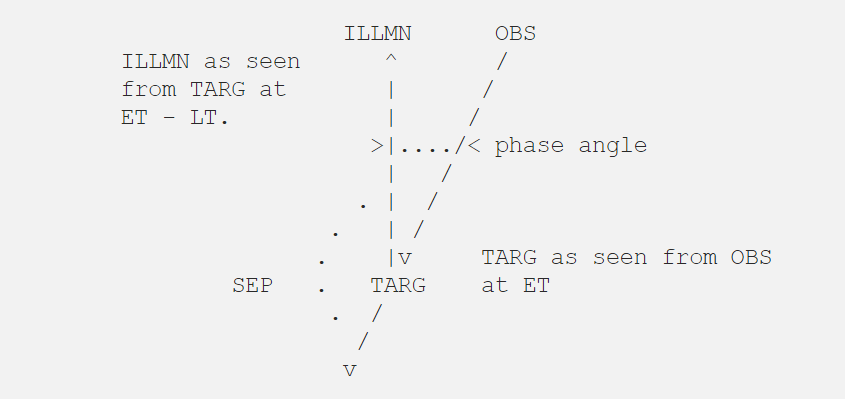

Applying the function and computational logic of <i><b><u>phaseq</u></b></i> on our problem leads to the following input parameters
1. <i>target</i>: The Earth (NAIF ID 399)
2. <i>illmn</i>: The Sun (NAIF ID 10)
3. <i>obsrvr</i>: Venus (NAIF IF 299)

Further we may notice another input parameter called <b><i>abcorr</i></b>. IN our last tutorial we computed state and directional vectors, phase angles and other parameters in rather simple steady states. Here we compute the distances in more precise way by considering the <b>light time</b> (travelling time of light) and taking the observes velocity into account. The resulting input arguement is <i><b>LT+S</b></i>

The corresponding SPICE documentation for corrections provides the following descriptions for the terms:
1. LT: correct for one-way light time (also called "planetary aberration") using a Newtonian formulation. This correction yields the state of the target at the moment it emitted photons arriving at the observer at ET.
2. LT+S: Correct for one-way light time and stellar aberration using a Newtonaian formulation. This option modifies the state obtained with the 'LT' option to account for the observer's velocity relative to the Solar System Barycenter. The result is the apparent state of the target, the position and velocity of the target as seen by the observer.

These corrections are necessary in our following tutorials, where we will also compute the positions of hazardous Asteroids where a correct timing and observation planning are crucial.